In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [120]:
hr = pd.read_csv('Documents/WA_Fn-UseC_-HR-Employee-Attrition.csv')
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [121]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [122]:
hr.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [123]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [124]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### data analysis

In [125]:
columns_1 = hr[['Attrition','BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','MaritalStatus','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany']]
columns_1

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,MaritalStatus,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,Yes,Travel_Rarely,Sales,2,Life Sciences,2,Female,3,Single,8,0,1,6
1,No,Travel_Frequently,Research & Development,1,Life Sciences,3,Male,2,Married,10,3,3,10
2,Yes,Travel_Rarely,Research & Development,2,Other,4,Male,2,Single,7,3,3,0
3,No,Travel_Frequently,Research & Development,4,Life Sciences,4,Female,3,Married,8,3,3,8
4,No,Travel_Rarely,Research & Development,1,Medical,1,Male,3,Married,6,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,2,Medical,3,Male,4,Married,17,3,3,5
1466,No,Travel_Rarely,Research & Development,1,Medical,4,Male,2,Married,9,5,3,7
1467,No,Travel_Rarely,Research & Development,3,Life Sciences,2,Male,4,Married,6,0,3,6
1468,No,Travel_Frequently,Sales,3,Medical,4,Male,2,Married,17,3,2,9


In [126]:
def graph_all(df):
    for column in df.columns:
        plt.figure(figsize=(10,3))
        sns.countplot(x=column,hue=column,data = df)
        plt.title(f"Distribution of {column}")
        plt.show()

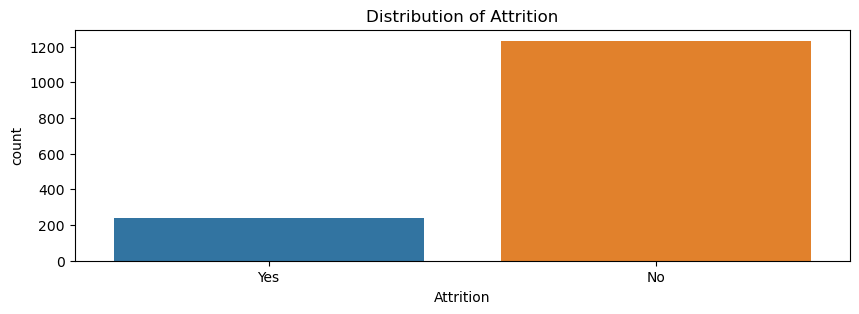

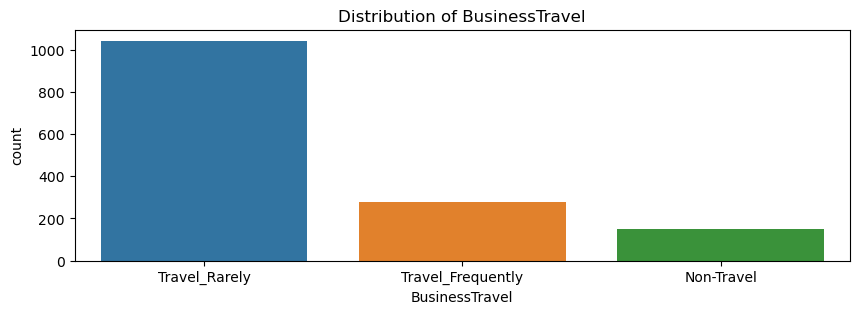

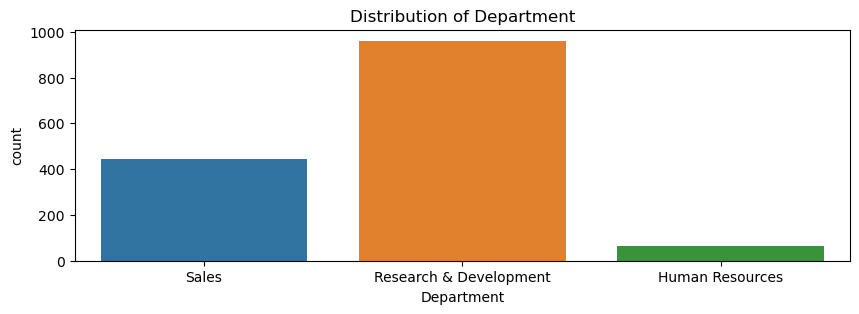

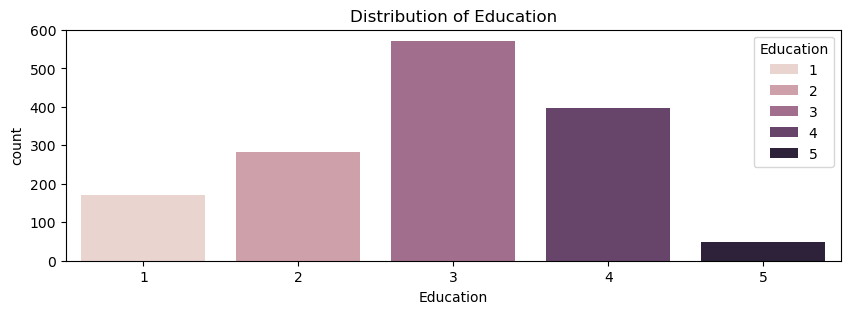

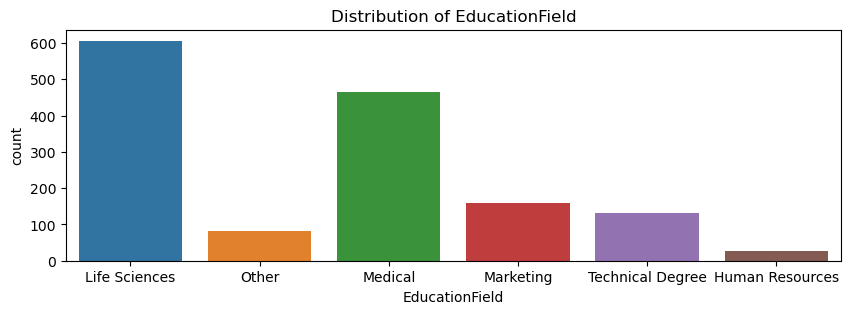

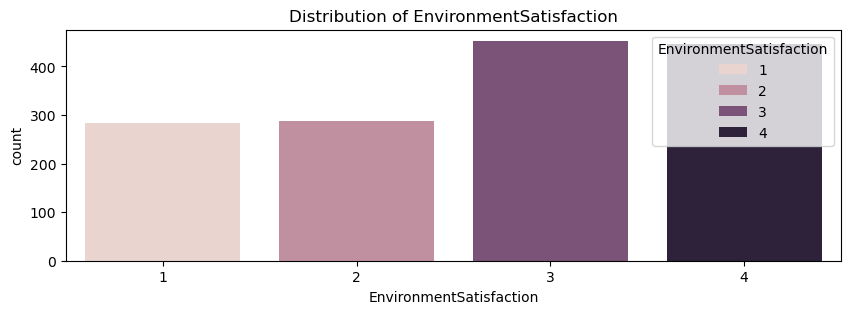

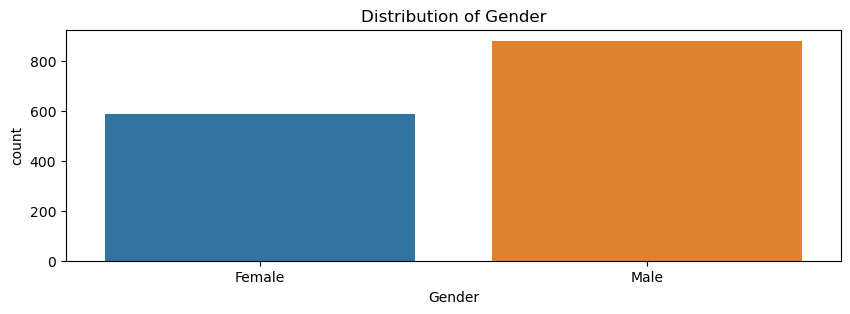

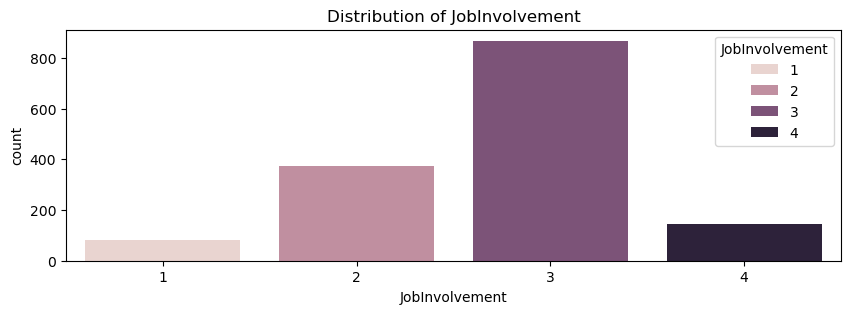

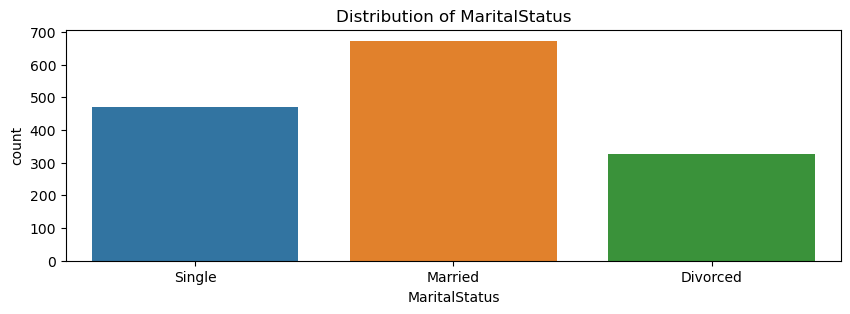

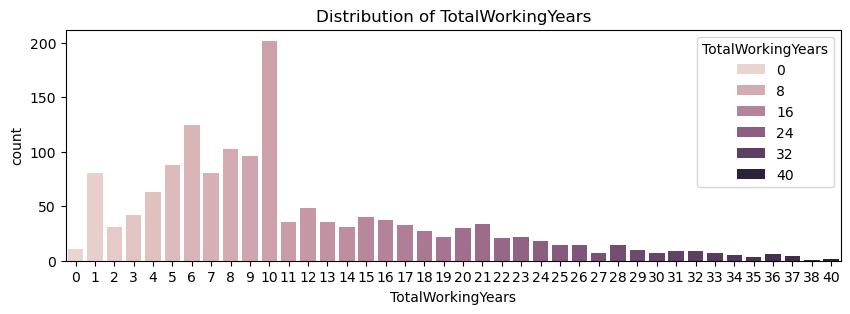

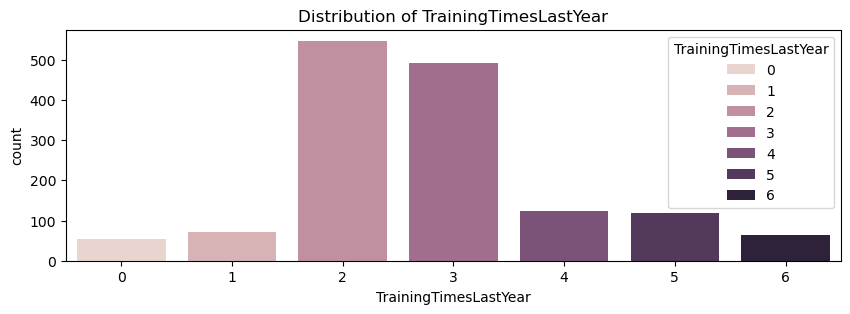

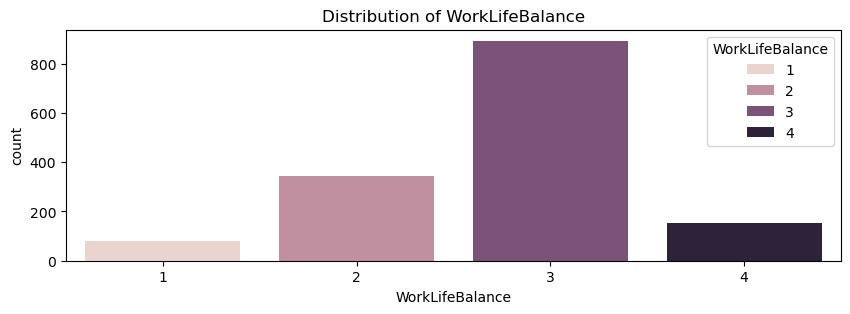

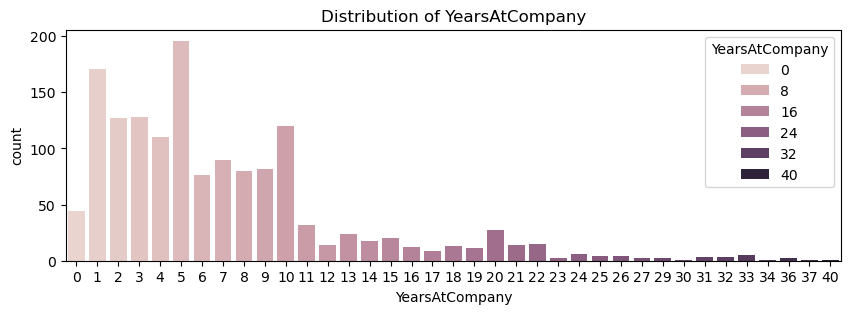

In [127]:
graph_all(columns_1)

In [128]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [129]:
columns_2  = hr[['DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','Age','MonthlyRate','PercentSalaryHike', 'PerformanceRating']]
columns_2 

,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,Age,MonthlyRate,PercentSalaryHike,PerformanceRating
0,1102,1,94,5993,41,19479,11,3
1,279,8,61,5130,49,24907,23,4
2,1373,2,92,2090,37,2396,15,3
3,1392,3,56,2909,33,23159,11,3
4,591,2,40,3468,27,16632,12,3
...,...,...,...,...,...,...,...,...
1465,884,23,41,2571,36,12290,17,3
1466,613,6,42,9991,39,21457,15,3
1467,155,4,87,6142,27,5174,20,4
1468,1023,2,63,5390,49,13243,14,3


In [130]:
def graph(df):
    for column in df.columns:
        
        plt.figure(figsize =(4,5))
        sns.distplot(x=df[column] )
        plt.title(f"Distplot of {column}")
        plt.show()
    

C:\Users\Admin\AppData\Local\Temp\ipykernel_1156\2261588434.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[column] )


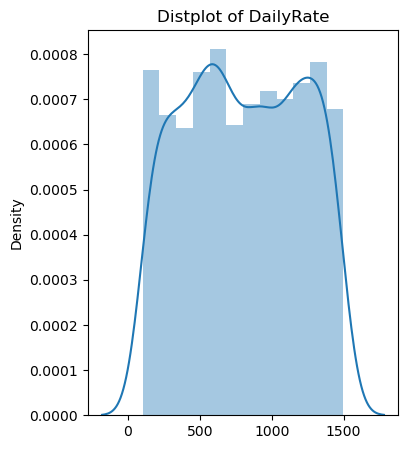

C:\Users\Admin\AppData\Local\Temp\ipykernel_1156\2261588434.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[column] )


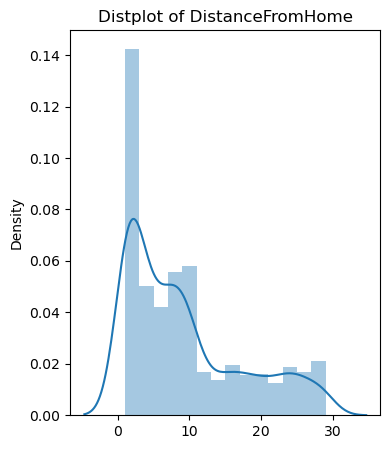

C:\Users\Admin\AppData\Local\Temp\ipykernel_1156\2261588434.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[column] )


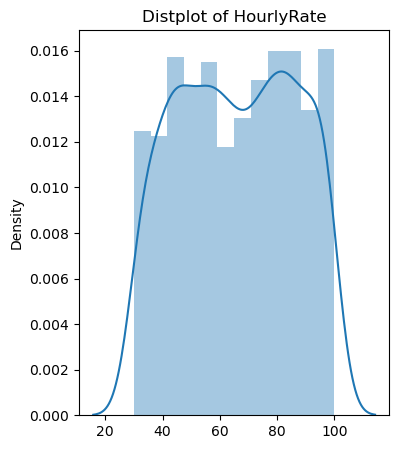

C:\Users\Admin\AppData\Local\Temp\ipykernel_1156\2261588434.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[column] )


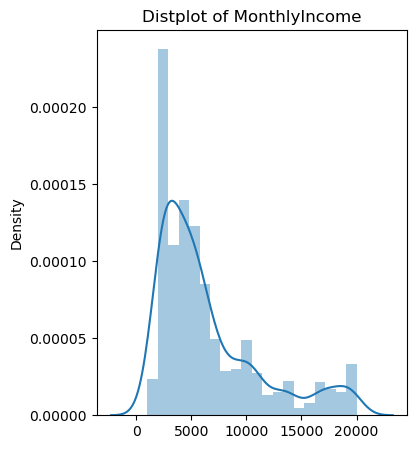

C:\Users\Admin\AppData\Local\Temp\ipykernel_1156\2261588434.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[column] )


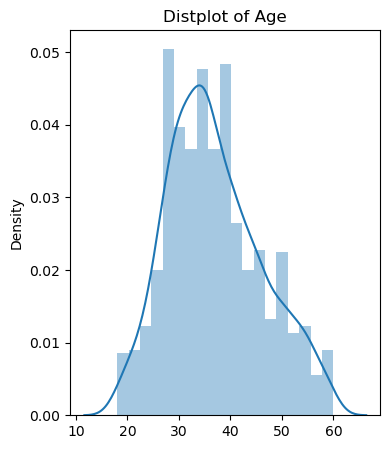

C:\Users\Admin\AppData\Local\Temp\ipykernel_1156\2261588434.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[column] )


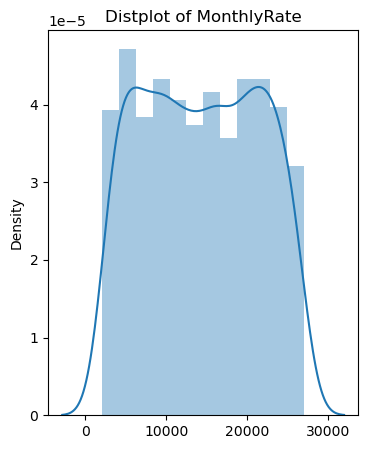

C:\Users\Admin\AppData\Local\Temp\ipykernel_1156\2261588434.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[column] )


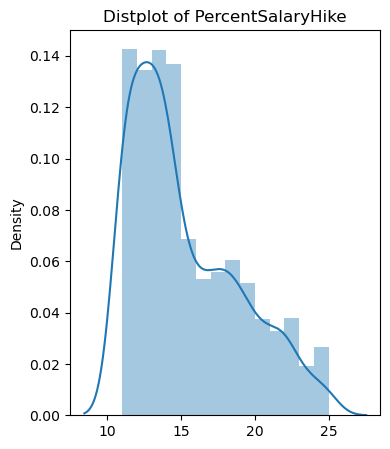

C:\Users\Admin\AppData\Local\Temp\ipykernel_1156\2261588434.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[column] )


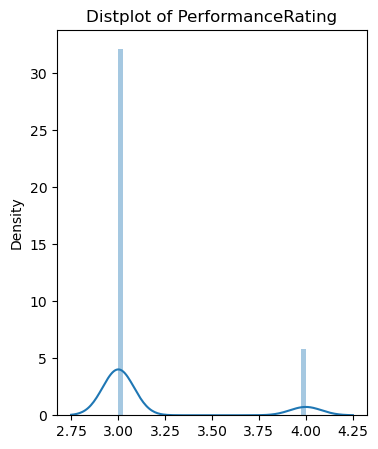

In [131]:
graph(columns_2)

In [132]:
hr.value_counts('Attrition')


Attrition
No     1233
Yes     237
Name: count, dtype: int64

clearly we can see there imblance between the data

In [133]:
hr_no = hr[hr['Attrition']=='No']
hr_yes =  hr[hr['Attrition'] =='Yes']
hr_yes


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,1,80,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,...,2,80,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,...,4,80,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2,12,3,3,6,3,0,1


In [134]:
hr_no  = hr_no.sample(n=237)
hr_no

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
110,51,No,Travel_Frequently,1456,Research & Development,1,4,Medical,1,145,...,3,80,0,23,1,2,13,12,12,8
746,41,No,Non-Travel,247,Research & Development,7,1,Life Sciences,1,1035,...,2,80,2,21,3,3,21,16,5,10
412,46,No,Travel_Rarely,1485,Research & Development,18,3,Medical,1,550,...,3,80,1,19,5,2,10,7,0,8
637,32,No,Non-Travel,300,Research & Development,1,3,Life Sciences,1,882,...,2,80,1,4,2,3,3,0,0,2
342,31,No,Travel_Rarely,1232,Research & Development,7,4,Medical,1,462,...,3,80,0,11,2,2,11,9,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,32,No,Travel_Rarely,498,Research & Development,3,4,Medical,1,966,...,3,80,1,8,2,4,8,7,6,3
1090,29,No,Travel_Rarely,441,Research & Development,8,1,Other,1,1544,...,3,80,1,9,3,3,7,7,0,7
306,32,No,Travel_Rarely,906,Sales,7,3,Life Sciences,1,420,...,3,80,1,13,3,2,13,8,4,8
1034,45,No,Travel_Rarely,1038,Research & Development,20,3,Medical,1,1460,...,2,80,1,24,2,3,7,7,0,7


In [135]:
hr = pd.concat([hr_no,hr_yes],axis =0)
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
110,51,No,Travel_Frequently,1456,Research & Development,1,4,Medical,1,145,...,3,80,0,23,1,2,13,12,12,8
746,41,No,Non-Travel,247,Research & Development,7,1,Life Sciences,1,1035,...,2,80,2,21,3,3,21,16,5,10
412,46,No,Travel_Rarely,1485,Research & Development,18,3,Medical,1,550,...,3,80,1,19,5,2,10,7,0,8
637,32,No,Non-Travel,300,Research & Development,1,3,Life Sciences,1,882,...,2,80,1,4,2,3,3,0,0,2
342,31,No,Travel_Rarely,1232,Research & Development,7,4,Medical,1,462,...,3,80,0,11,2,2,11,9,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,1,80,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,...,2,80,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,...,4,80,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2,12,3,3,6,3,0,1


In [136]:
hr.value_counts('BusinessTravel')

BusinessTravel
Travel_Rarely        318
Travel_Frequently    114
Non-Travel            42
Name: count, dtype: int64

### LabelEncoding

In [137]:
Attrition = LabelEncoder()
hr['Attrition'] = Attrition.fit_transform(hr['Attrition'])
BusinessTravel	= LabelEncoder()
hr['BusinessTravel'] = BusinessTravel.fit_transform(hr['BusinessTravel'])
Department	= LabelEncoder()
hr['Department'] = Department.fit_transform(hr['Department'])
EducationField	= LabelEncoder()
hr['EducationField'] = EducationField.fit_transform(hr['EducationField'])
Gender	= LabelEncoder()
hr['Gender'] = Gender.fit_transform(hr['Gender'])
JobRole	= LabelEncoder()
hr['JobRole'] = JobRole.fit_transform(hr['JobRole'])
MaritalStatus	= LabelEncoder()
hr['MaritalStatus'] = MaritalStatus.fit_transform(hr['MaritalStatus'])
Over18 	= LabelEncoder()
hr['Over18'] =  Over18.fit_transform(hr['Over18'])
OverTime 	= LabelEncoder()
hr['OverTime'] =  OverTime.fit_transform(hr['OverTime'])


In [138]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
110,51,0,1,1456,1,1,4,3,1,145,...,3,80,0,23,1,2,13,12,12,8
746,41,0,0,247,1,7,1,1,1,1035,...,2,80,2,21,3,3,21,16,5,10
412,46,0,2,1485,1,18,3,3,1,550,...,3,80,1,19,5,2,10,7,0,8
637,32,0,0,300,1,1,3,1,1,882,...,2,80,1,4,2,3,3,0,0,2
342,31,0,2,1232,1,7,4,3,1,462,...,3,80,0,11,2,2,11,9,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,1,1,638,2,9,3,2,1,2023,...,1,80,1,1,3,2,1,0,1,0
1442,29,1,2,1092,1,1,4,3,1,2027,...,2,80,3,4,3,4,2,2,2,2
1444,56,1,2,310,1,7,2,5,1,2032,...,4,80,1,14,4,1,10,9,9,8
1452,50,1,1,878,2,1,4,1,1,2044,...,4,80,2,12,3,3,6,3,0,1


In [139]:
correlation = hr.corr()
correlation

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.174197,3.678120e-02,0.035248,0.069205,-0.018935,0.233297,-0.075850,NaN,0.035966,...,0.081475,NaN,0.089759,0.680854,-0.027978,-0.021387,0.410800,0.300740,0.314128,0.304791
Attrition,-0.174197,1.000000,3.904344e-02,-0.058797,0.018986,0.081924,-0.026687,0.095991,NaN,-0.042907,...,-0.033652,NaN,-0.212938,-0.220643,-0.065140,-0.089725,-0.229036,-0.275685,-0.114825,-0.271555
BusinessTravel,0.036781,0.039043,1.000000e+00,0.001655,0.039511,-0.032889,0.014828,0.025928,NaN,-0.031662,...,-0.068761,NaN,0.009622,0.068868,0.053931,-0.018611,0.045248,0.048626,-0.046196,0.027672
DailyRate,0.035248,-0.058797,1.654711e-03,1.000000,-0.068978,-0.055460,-0.019791,0.022951,NaN,-0.067923,...,0.030827,NaN,-0.014211,0.060410,-0.011207,0.005966,-0.032883,-0.017276,-0.045542,-0.025098
Department,0.069205,0.018986,3.951051e-02,-0.068978,1.000000,-0.043195,-0.034727,0.019641,NaN,0.001204,...,-0.032827,NaN,-0.063968,0.072246,0.061489,0.017717,0.060302,0.078678,0.131791,0.045334
DistanceFromHome,-0.018935,0.081924,-3.288872e-02,-0.055460,-0.043195,1.000000,0.059798,-0.061255,NaN,0.077037,...,0.018832,NaN,0.027244,0.005004,-0.069560,-0.039789,-0.012727,-0.040407,-0.030056,0.041680
Education,0.233297,-0.026687,1.482770e-02,-0.019791,-0.034727,0.059798,1.000000,-0.057226,NaN,0.069943,...,0.040275,NaN,0.018757,0.152803,-0.051153,-0.077153,0.132659,0.103489,0.126910,0.118322
EducationField,-0.075850,0.095991,2.592757e-02,0.022951,0.019641,-0.061255,-0.057226,1.000000,NaN,-0.051589,...,-0.025837,NaN,-0.042729,-0.044881,0.012282,0.021029,-0.036094,-0.021068,-0.017533,0.003079
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.035966,-0.042907,-3.166212e-02,-0.067923,0.001204,0.077037,0.069943,-0.051589,NaN,1.000000,...,-0.065258,NaN,0.143888,-0.003716,-0.030818,0.029714,0.005985,-0.005464,-0.003008,0.003863


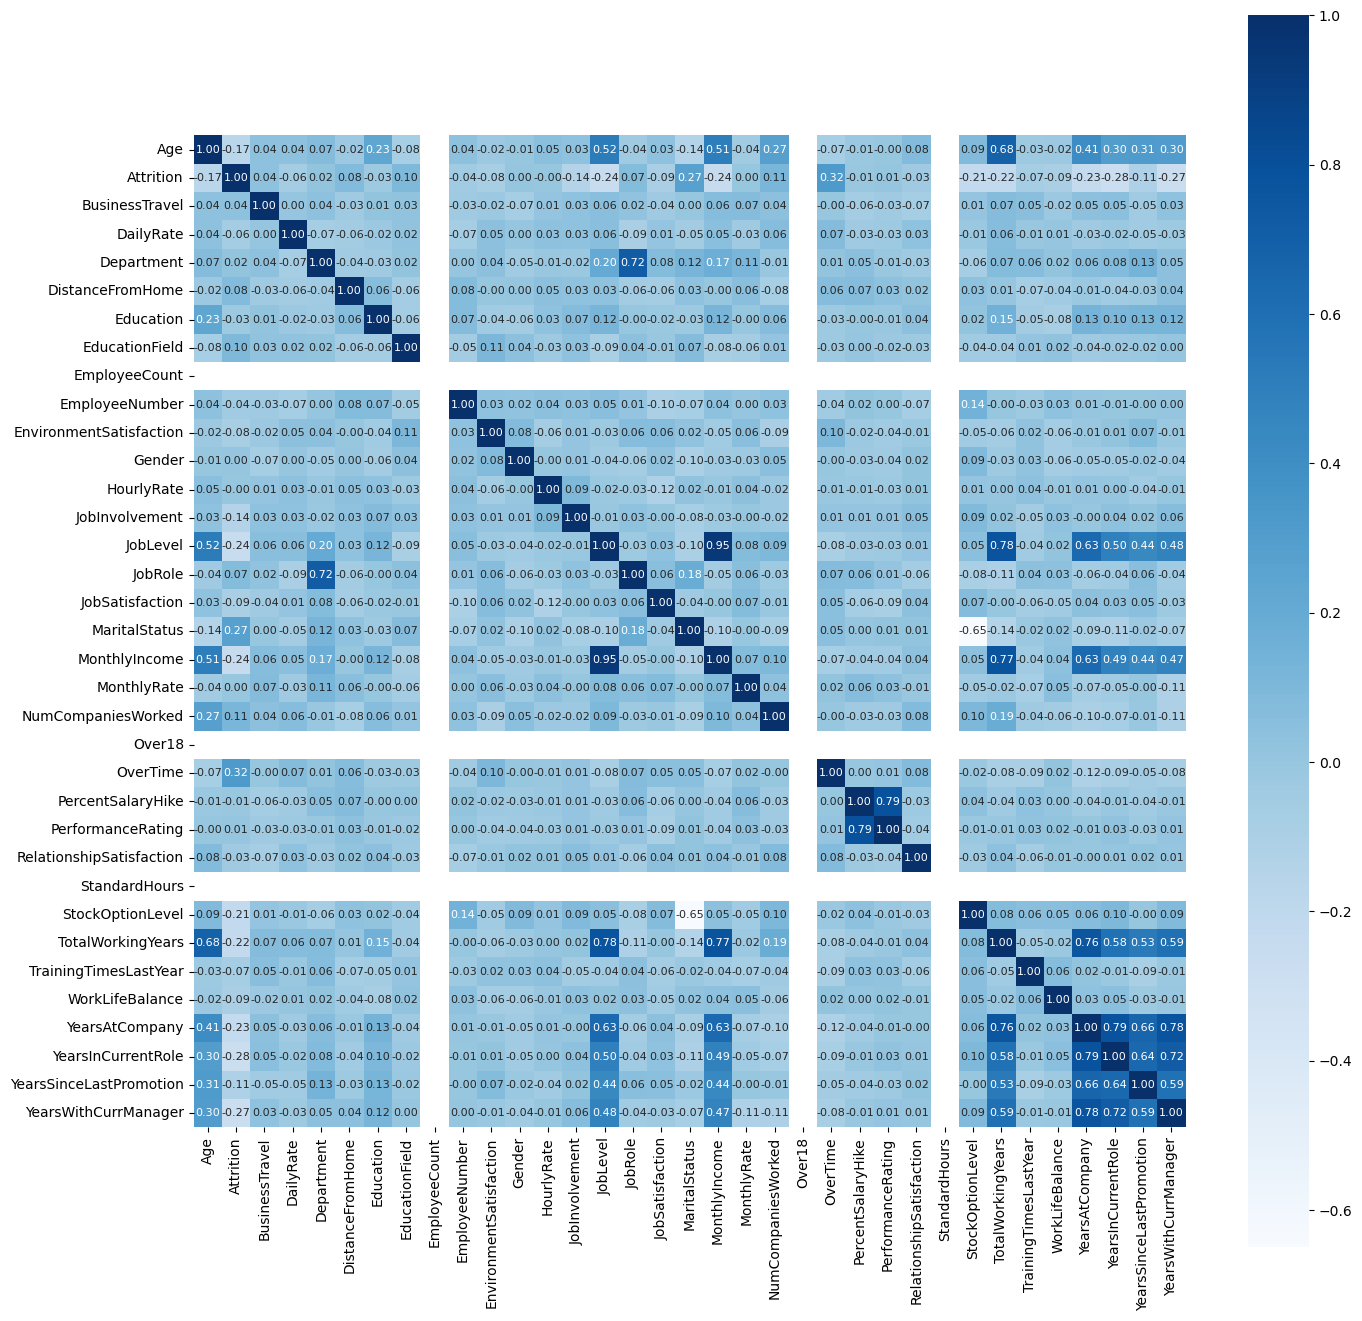

In [140]:
plt.figure(figsize =(16,16))
sns.heatmap(correlation ,cmap = 'Blues' ,fmt = '.2f',cbar = True ,square =True,annot =True,annot_kws = {'size': 8})
plt.show()

### Spiltting of data

In [141]:

X = hr.drop(columns = 'Attrition')
Y =hr['Attrition']
print(X)
print(Y)


      Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
110    51               1       1456           1                 1          4   
746    41               0        247           1                 7          1   
412    46               2       1485           1                18          3   
637    32               0        300           1                 1          3   
342    31               2       1232           1                 7          4   
...   ...             ...        ...         ...               ...        ...   
1438   23               1        638           2                 9          3   
1442   29               2       1092           1                 1          4   
1444   56               2        310           1                 7          2   
1452   50               1        878           2                 1          4   
1461   50               2        410           2                28          3   

      EducationField  Emplo

### standarzing data

In [142]:
scaler = StandardScaler()
standarized = scaler.fit_transform(X)
X = standarized
X

array([[ 1.71289573, -0.89799913,  1.71290085, ...,  2.19060955,
         2.85938829,  1.20087747],
       [ 0.62788627, -2.44021503, -1.32262863, ...,  3.27504708,
         0.78879677,  1.77295378],
       [ 1.170391  ,  0.64421677,  1.78571339, ...,  0.83506265,
        -0.69019717,  1.20087747],
       ...,
       [ 2.25540045,  0.64421677, -1.16444968, ...,  1.37728141,
         1.97199193,  1.20087747],
       [ 1.60439478, -0.89799913,  0.2616717 , ..., -0.24937487,
        -0.69019717, -0.80138959],
       [ 1.60439478,  0.64421677, -0.91337197, ..., -0.52048425,
        -0.0985996 , -1.08742774]])

#### splitting of the data

In [143]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,stratify =Y,random_state = 2)

In [144]:
print(X.shape,X_train.shape,X_test.shape)

(474, 34) (379, 34) (95, 34)


### model fitting

In [145]:
model = SVC(kernel ='linear')
model.fit(X_train,Y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [146]:
train_prediction = model.predict(X_train)
train_accuracy = accuracy_score(Y_train ,train_prediction)
train_accuracy

0.7889182058047494

In [147]:
test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(Y_test ,test_prediction)
test_accuracy

0.6947368421052632

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
model_1 =LogisticRegression()
model_1.fit(X_train,Y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [150]:
train_prediction = model_1.predict(X_train)
train_accuracy = accuracy_score(Y_train ,train_prediction)
train_accuracy

0.7968337730870713

In [151]:
test_prediction = model_1.predict(X_test)
test_accuracy = accuracy_score(Y_test ,test_prediction)
test_accuracy

0.7157894736842105

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
model_2  = RandomForestClassifier()
model_2.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [154]:
train_prediction = model_2.predict(X_train)
train_accuracy = accuracy_score(Y_train ,train_prediction)
train_accuracy

1.0

In [155]:
test_prediction = model_2.predict(X_test)
test_accuracy = accuracy_score(Y_test ,test_prediction)
test_accuracy

0.6736842105263158

### Model Prediction

In [159]:
input_data = ([41,'Travel_Rarely',1102,'Sales',1,2,'Life Sciences',1,1,2,'Female',94,3,2,'Sales Executive',4,'Single',5993,19479,8,'Y','Yes',11,3,1,80,0,8,0,1,6,4,0,5])
input_data[1] =  BusinessTravel.transform([input_data[1]])[0]
input_data[3] = Department.transform([input_data[3]])[0]
input_data[6] =  EducationField.transform([input_data[6]])[0]
input_data[10] =   Gender.transform([input_data[10]])[0]
input_data[14] =   JobRole.transform([input_data[14]])[0]
input_data[16] =   MaritalStatus.transform([input_data[16]])[0]
input_data[20] =  Over18.transform([input_data[20]])[0]
input_data[21] =  OverTime.transform([input_data[21]])[0]
input_data_as_array =  np.array(input_data)
input_data_reshape = input_data_as_array.reshape(1,-1)
input_data_scaler = scaler.transform(input_data_reshape)
prediction = model.predict(input_data_scaler)
if (prediction[0] ==0):
    print("The Employee will not churn")
else:
    print("The Employee will  churn")


The Employee will  churn


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
